In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import time
import matplotlib.pyplot as plt
import random

In [8]:
def defensa_optima(x,f,n):
    if n == 0:
        return 0

    OPT = [[0] * (n+1) for _ in range(n+1)]

    for m in range(1, n+1):
        for j in range(1, m+1):
            OPT[m][j] = max(OPT[m][j-1], (OPT[m-j][m-j] + min(f[j], x[m])))

    return OPT

def reconstruccion(OPT, n):
    reco = []
    max_bajas = OPT[n][n]
    m, j = n,n
    while j != 0:
        if OPT[m][j] != OPT[m][j-1]:
            reco.insert(0, "ATACAR")
            for i in range(j-1):
                reco.insert(0, "CARGAR")
            m -= j
            j = m
        else:
            j -= 1

    return reco, max_bajas

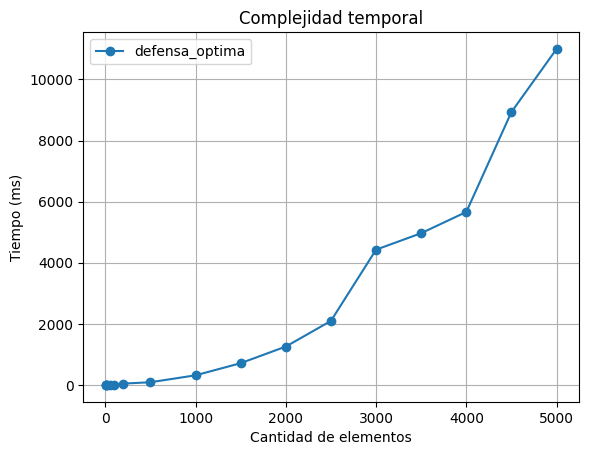

In [18]:
import os

def leer_prueba(path_prueba):
    x = []
    x.append(0)
    f = []
    f.append(0)
    with open(path_prueba, 'r') as file:
        file.readline()
        n = int(file.readline().strip())

        for _ in range(n):
            x.append(int(file.readline().strip()))

        for _ in range(n):
            f.append(int(file.readline().strip()))

    return n, x, f

path_pruebas = '/content/drive/MyDrive/set_pruebas_tp2/'

i = 0

tiempos = []
tamanos = [5,10,10,20,50, 100,200,500 ,1000,1500,2000,2500,3000,3500,4000,4500,5000]

for file in os.listdir(path_pruebas):

    prueba = file
    file = path_pruebas + file

    n, x, f = leer_prueba(file)

    inicio = time.time()
    OPT = defensa_optima(x, f, n)
    fin = time.time()
    tiempo_transcurrido = (fin - inicio) * 1000  # Convertir a milisegundos
    tiempos.append(tiempo_transcurrido)

tiempos.sort()

plt.plot(tamanos, tiempos, marker='o', label = "defensa_optima")
plt.legend()

plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (ms)')
plt.title('Complejidad temporal')
plt.grid(True)
plt.show()